In [1]:
import numpy as np
import pandas as pd
from scipy.linalg import svd
import matplotlib.pyplot as plt
from IPython.display import display, Math
import seaborn as sns

In [2]:
# Read file and store as pandas dataframe
filename = '../Data/day.csv'

df = pd.read_csv(filename)

In [3]:
# Quick glance at information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
# Quick glance at summary statistics of dataset
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [5]:
# Remove 'instant' and 'dteday' attributes
# 'instant' is not useful
# 'dteday' is a str object
df = df.drop('instant', axis=1)
df = df.drop('dteday', axis=1)

In [6]:
# Summary information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  casual      731 non-null    int64  
 12  registered  731 non-null    int64  
 13  cnt         731 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.1 KB


In [7]:
# Extract attribute names
attributeNames = list(df.columns)
print(attributeNames)

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


In [8]:
# Check attributes and data shape
N, M = df.shape
print("No. of instances, N: ", N)
print("No. of attributes, M: ", M)

No. of instances, N:  731
No. of attributes, M:  14


In [9]:
# Undo the original max-min normalization
temp = df.columns.get_loc("temp")
atemp = df.columns.get_loc("atemp")
hum = df.columns.get_loc("hum")
windspeed = df.columns.get_loc("windspeed")

X = df.values
for row in range(0, N):
    X[row, temp] = X[row, temp]*(39-(-8)) + (-8)
    X[row, atemp] = X[row, atemp]*(50-(-16)) + (-16)
    X[row, hum] = X[row, hum]*100
    X[row, windspeed] = X[row, windspeed]*67
    
# Standarize ratio data attributes for PCA
cnt_col = df.columns.get_loc("cnt")
print("cnt_col: ", cnt_col)

for col in range(temp, cnt_col+1):
    # subtract mean, column by column
    mn = X[:, col].mean(0)
    X[:, col] = X[:, col] - np.ones(N) * mn
    X[:, col] = X[:, col] * (1/np.std(X[:, col]))
    
# Check standardization
print("mean cnt: ", X[:, cnt_col].mean(0))
print("std cnt: ", np.std(X[:, cnt_col]))



cnt_col:  13
mean cnt:  -1.166417623682791e-16
std cnt:  0.9999999999999999


In [11]:
# Focus on the last 7 attributes for now
col1 = df.columns.get_loc("temp")
col2 = df.columns.get_loc("cnt")

# Resize the matrices
X = X[:,col1:col2+1]
attributeNames = attributeNames[col1:col2+1]

X.shape

(731, 7)

In [12]:
# PCA by computing SVD
U, S, V = svd(X, full_matrices=False)

print("U: ", U.shape)
print("S: ", S.shape)
print("V: ", V.shape)

# Compute variance explained by principal components
rho = (S*S) / (S*S).sum()
print("rho: ", rho.shape)

# Project data onto principal component space
Z = X @ V

U:  (731, 7)
S:  (7,)
V:  (7, 7)
rho:  (7,)


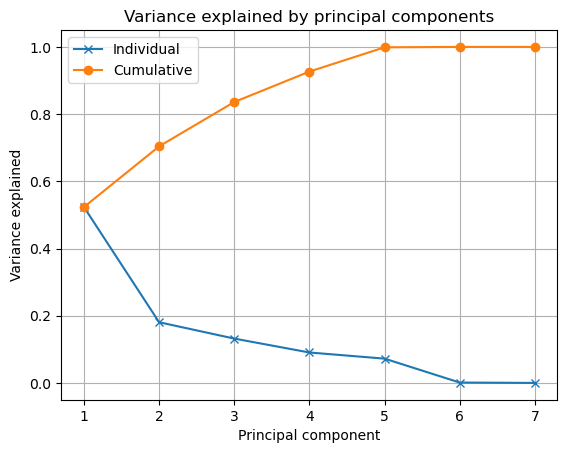

In [13]:
# Plot variance explained
plt.figure()
plt.plot(range(1, len(rho)+1), rho, 'x-')
plt.plot(range(1, len(rho)+1), np.cumsum(rho), 'o-')
plt.title('Variance explained by principal components')
plt.xlabel('Principal component')
plt.ylabel('Variance explained')
plt.legend(['Individual', 'Cumulative'])
plt.grid()
plt.show()

In [14]:
# Utility function to print matrices nicely
def print_matrix(array):
    matrix = ''
    for row in array:
        try:
            for number in row:
                matrix += f'{number}&'
        except TypeError:
            matrix += f'{row}&'
        matrix = matrix[:-1] + r'\\'
    display(Math(r'\begin{bmatrix}'+matrix+r'\end{bmatrix}'))

# Display PCA loadings
print_matrix(V.round(2))
for attribute in attributeNames:
    print(attribute)

<IPython.core.display.Math object>

temp
atemp
hum
windspeed
casual
registered
cnt


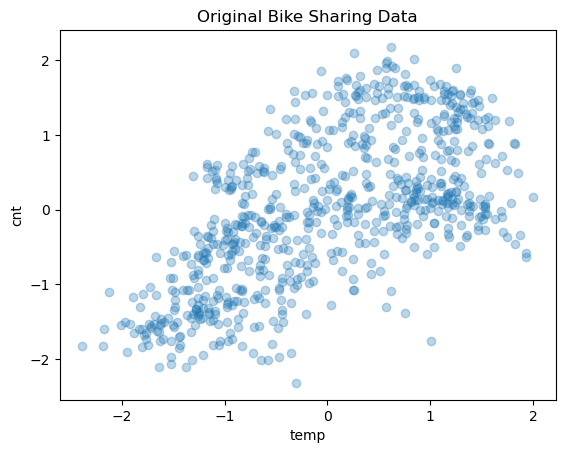

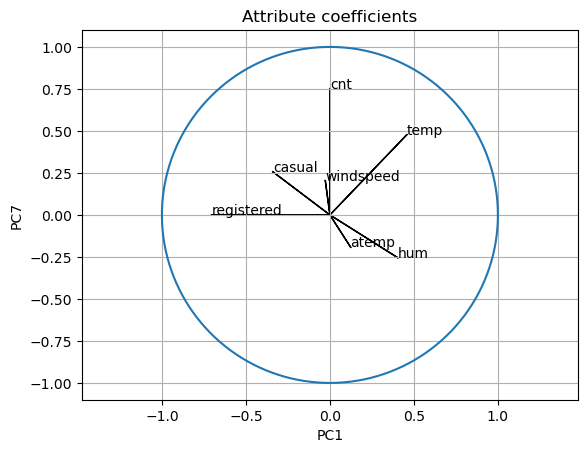

In [17]:
# Data attributes to be plotted
i = 0
j = 6

# Scatter plot of original data
plt.figure()
plt.title('Original Bike Sharing Data')
plt.plot(X[:, i], X[:, j], 'o', alpha=.3)
plt.xlabel(attributeNames[i])
plt.ylabel(attributeNames[j])
plt.show()

# Plot attribute coefficients in principal component space
# Draws a vector for each attribute
plt.figure()
for att in range(V.shape[1]):       
    plt.arrow(0,0, V[att,i], V[att,j])
    plt.text(V[att,i], V[att,j], attributeNames[att])
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.xlabel('PC'+str(i+1))
plt.ylabel('PC'+str(j+1))
plt.grid()
plt.axis('equal')

# Add a unit circle
plt.plot(np.cos(np.arange(0, 2*np.pi, 0.01)), 
     np.sin(np.arange(0, 2*np.pi, 0.01)));
plt.title('Attribute coefficients')
plt.show()

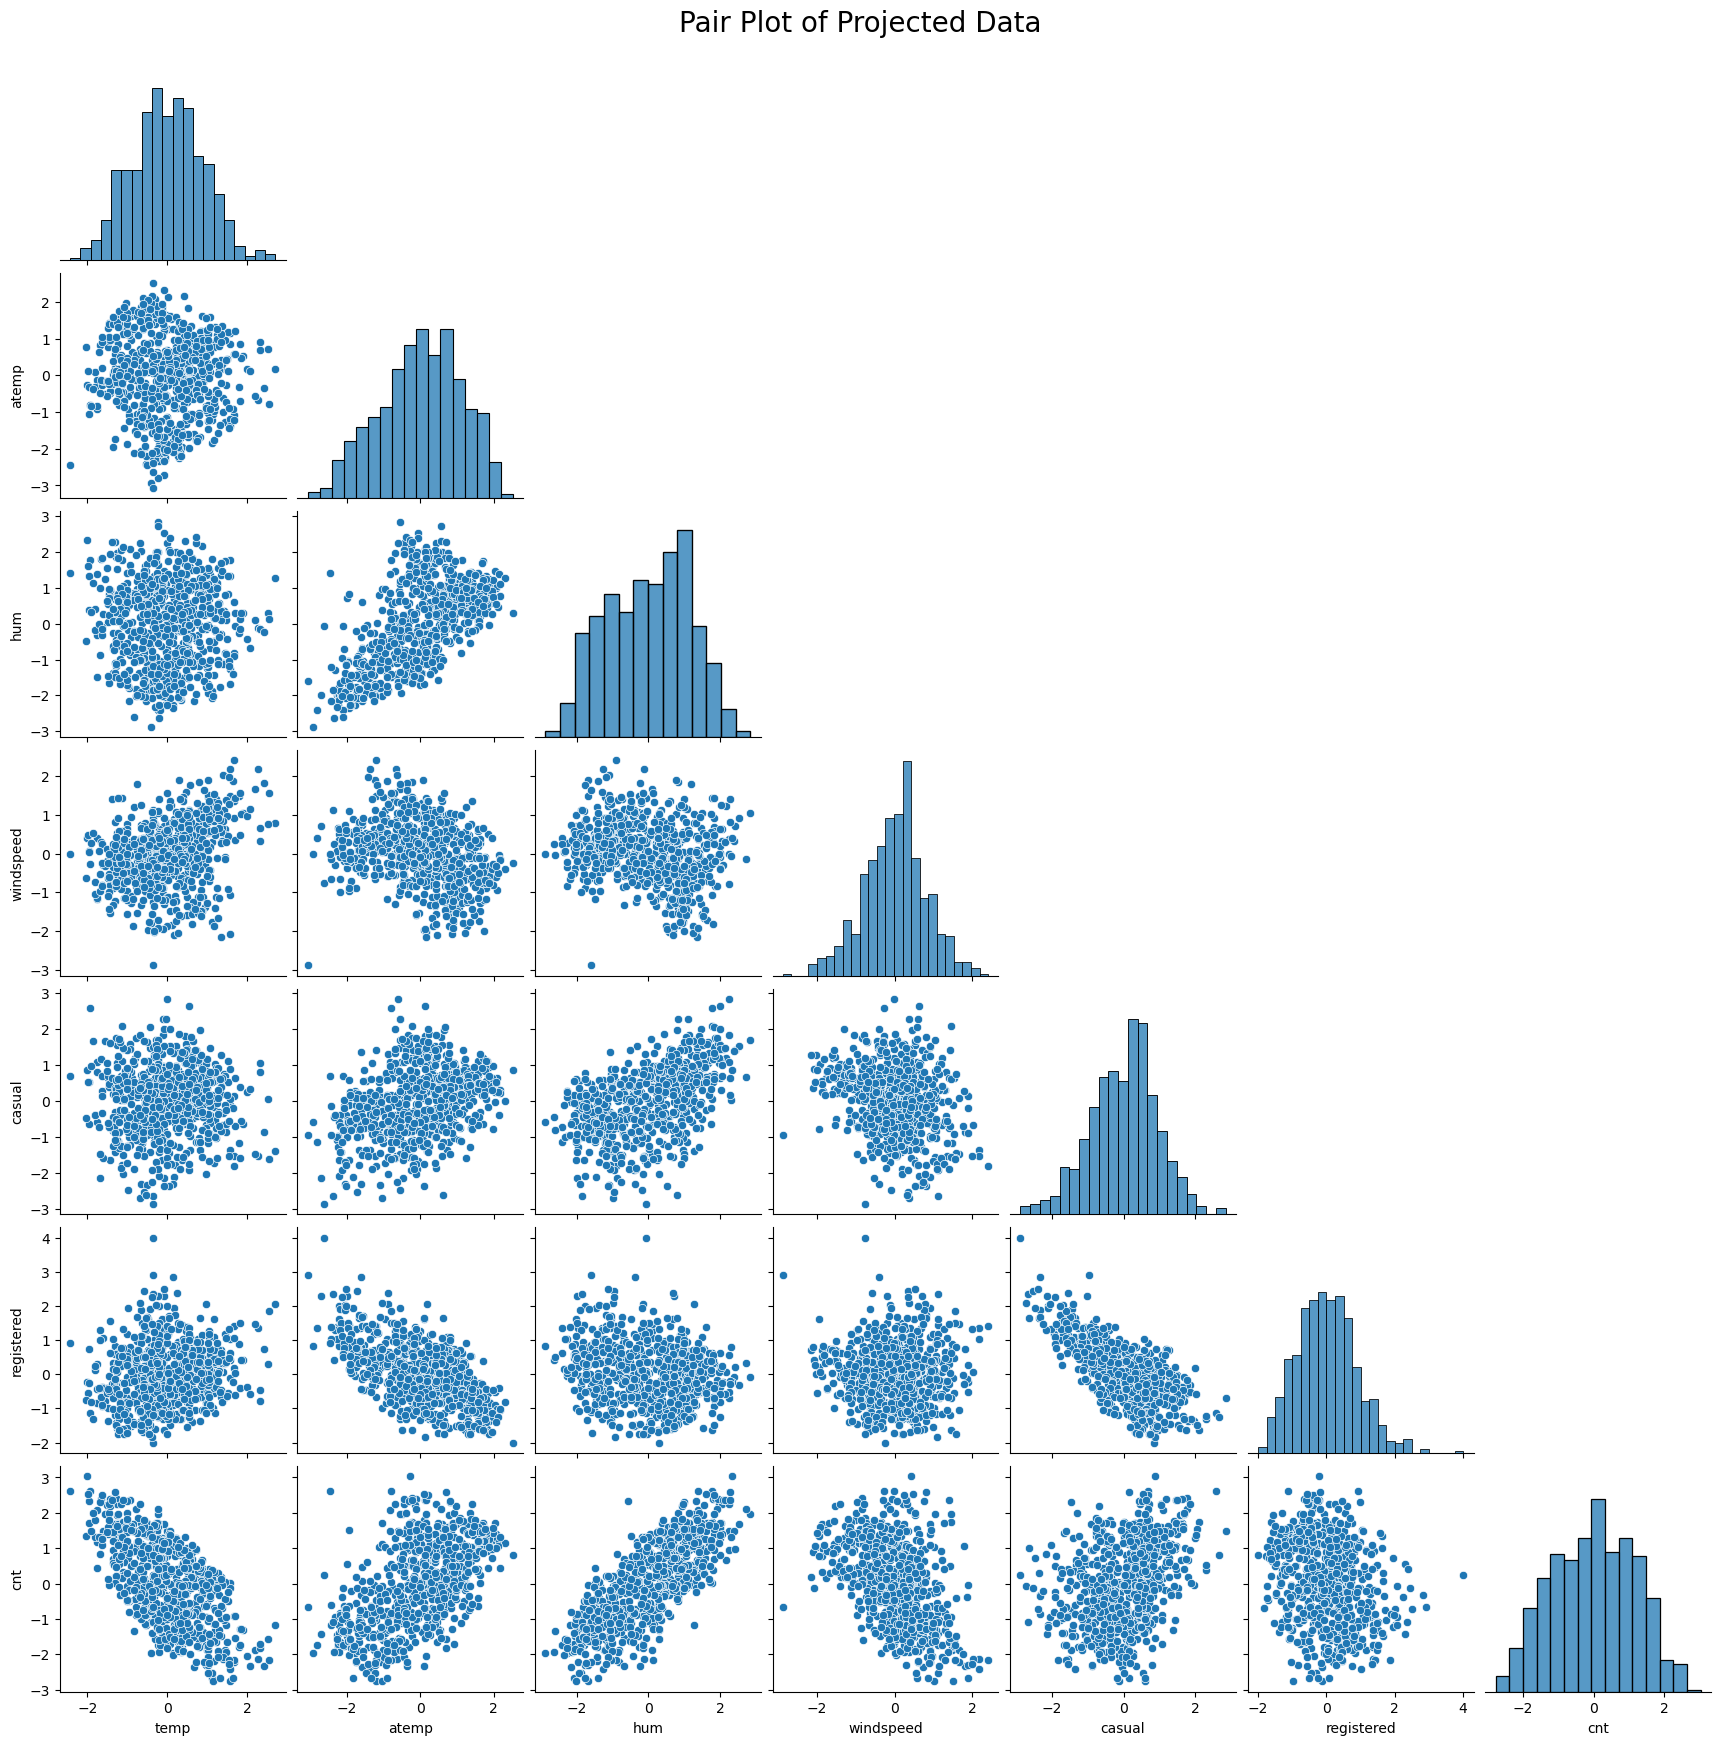

In [16]:
# Generate pairplot of projected data for all attributes
proj_df = pd.DataFrame(Z, columns = attributeNames)
pp = sns.pairplot(proj_df, corner=True)
pp.fig.suptitle('Pair Plot of Projected Data', y=1, fontsize=20)
plt.show()

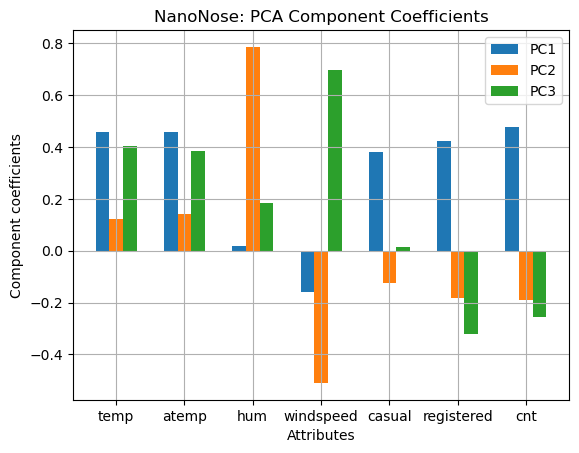

In [21]:
# Bar plot of significant PCs
V_bar = V.T
pcs = [0,1,2]
legendStrs = ['PC'+str(e+1) for e in pcs]
c = ['r','g','b']
bw = .2
r = np.arange(1,len(attributeNames)+1)
for i in pcs:    
    plt.bar(r+i*bw, V[i,:], width=bw)
plt.xticks(r+bw, attributeNames)
plt.xlabel('Attributes')
plt.ylabel('Component coefficients')
plt.legend(legendStrs)
plt.grid()
plt.title('NanoNose: PCA Component Coefficients')
plt.show()

## PCA Tasks for Report
1. The amount of variation explained as a function of the number of PCA components included
2. The principal directions of the considered PCA components (either find a way to plot them or interpret them in terms of the features),
3. The data projected onto the considered principal components.